图像运算

In [40]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision import transforms

In [6]:
filename = 'D:\code\pytorch_learn\data\mao.jpg'

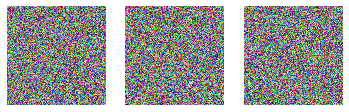

In [3]:
img1 = np.random.randint(0, 255, size=(128, 128, 3), dtype=np.uint8)
img2 = np.random.randint(0, 255, size=(128, 128, 3), dtype=np.uint8)
img3 = img1 + img2
plt.subplot(1, 3, 1); plt.imshow(img1); plt.axis('off')
plt.subplot(1, 3, 2); plt.imshow(img2); plt.axis('off')
plt.subplot(1, 3, 3); plt.imshow(img3); plt.axis('off')
plt.show()

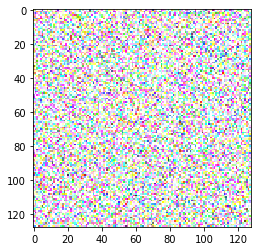

In [5]:
img4 = cv2.add(img1, img2)  # 如果运算结果大于 255, 会得到 255
plt.imshow(img4)

(-0.5, 899.5, 899.5, -0.5)

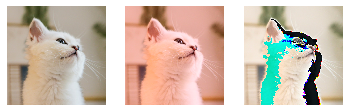

In [16]:
img = np.array(Image.open(filename))
plt.subplot(1, 3, 1); plt.imshow(img); plt.axis('off')
img2 = cv2.add(img, 50)
plt.subplot(1, 3, 2); plt.imshow(img2); plt.axis('off')
img3 = img + 50
plt.subplot(1, 3, 3); plt.imshow(img3); plt.axis('off')

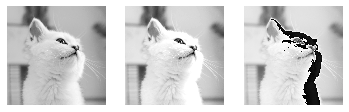

In [41]:
img = cv2.imread(filename, flags=cv2.IMREAD_GRAYSCALE)
plt.subplot(1, 3, 1); plt.imshow(img, cmap='gray'); plt.axis('off')
img2 = cv2.add(img, 50)
plt.subplot(1, 3, 2); plt.imshow(img2, cmap='gray'); plt.axis('off')
img3 = img + 50
plt.subplot(1, 3, 3); plt.imshow(img3, cmap='gray'); plt.axis('off')
plt.show()

(400, 400, 3) (400, 400, 3)


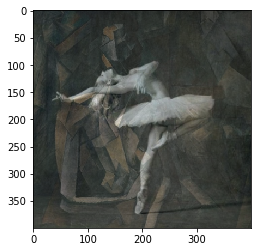

In [43]:
file1 = r'D:\code\pytorch_learn\data\neural_transfer\dancing.jpg'
file2 = r'D:\code\pytorch_learn\data\neural_transfer\picasso.jpg'
img1 = Image.open(file1)
img2 = Image.open(file2)
resize = transforms.Resize(400)
img1 = np.array(resize(img1))
img2 = np.array(resize(img2))
print(img1.shape, img2.shape)
img3 = cv2.addWeighted(img1, 0.6, img2, 0.4, 3)  # 加权和
plt.imshow(img3)

![位运算](https://res.weread.qq.com/wrepub/epub_26297910_39)

与 0 或 255 进行 and 运算
![](https://res.weread.qq.com/wrepub/epub_26297910_43)

- 按位与运算是指将数值转换为二进制值后，在对应的位置上进行与运算
- 按位或运算是指将数值转换为二进制值后，在对应的位置上进行或运算
- 按位非运算是指将数值转换为二进制值后，在对应的位置上进行非运算
- 按位异或运算是指将数值转换为二进制值后，在对应的位置上进行异或运算

OpenCV中的很多函数都会指定一个掩模, 也被称为掩码.

当使用掩模参数时, 操作只会在掩模值为非空的像素点上执行, 并将其他像素点的值置为0.

In [47]:
img1 = np.full((3, 3), 4, dtype=np.uint8)
img2 = np.full((3, 3), 8, dtype=np.uint8)
mask = np.full((3, 3), 0, dtype=np.uint8)
mask[1:2, 1:3] = 1
print(img1)
print(img2)
print(mask)
img3 = cv2.add(img1, img2, mask=mask)
print(img3)

[[4 4 4]
 [4 4 4]
 [4 4 4]]
[[8 8 8]
 [8 8 8]
 [8 8 8]]
[[0 0 0]
 [0 1 1]
 [0 0 0]]
[[ 0  0  0]
 [ 0 12 12]
 [ 0  0  0]]


将灰度图像中处于同一比特位上的二进制像素值进行组合，得到一幅二进制值图像，该图像被称为灰度图像的一个位平面，这个过程被称为位平面分解。

通过提取灰度图像像素点二进制像素值的每一比特位的组合，可以得到多个位平面图像。图像中全部像素值的ai值所构成的位平面，称为第i个位平面（第i层）。在8位灰度图中，可以组成8个二进制值图像，即可以将原图分解为8个位平面。

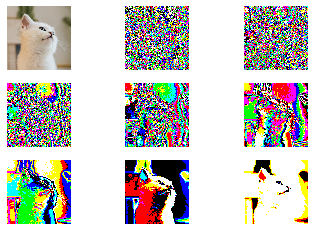

In [57]:
# 获取位平面
img = np.array(Image.open(filename))
plt.subplot(3, 3, 1); plt.imshow(img); plt.axis('off')
x_shape = img.shape + (8, )
x = np.zeros(x_shape, dtype=np.uint8)  # 提取矩阵
for i in range(8):
    x[..., i] = 2 ** i
result = np.zeros(x_shape, dtype=np.uint8)  # 结果矩阵
for i in range(8):
    result[..., i] = cv2.bitwise_and(img, x[..., i])  # 提取平面, 只保留当前平面的值
    mask = result[..., i] > 0  # 将其中大于 0 的值处理为 255
    result[mask] = 255
    plt.subplot(3, 3, 2+i); plt.imshow(result[..., i]); plt.axis('off')
plt.show()

通过对原始图像与密钥图像进行按位异或，可以实现加密；将加密后的图像与密钥图像再次进行按位异或，可以实现解密。

```
xor(a, b) = c
xor(c, b) = a
xor(c, a) = b
```
a 是原始图像, b 是密钥图像, c 是加密后的图像

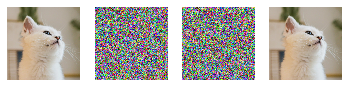

In [60]:
img = np.array(Image.open(filename))
plt.subplot(1, 4, 1); plt.imshow(img); plt.axis('off')
key = np.random.randint(0, 255, size=img.shape, dtype=np.uint8)
plt.subplot(1, 4, 2); plt.imshow(key); plt.axis('off')
encrypt = cv2.bitwise_xor(img, key)
plt.subplot(1, 4, 3); plt.imshow(encrypt); plt.axis('off')
source = cv2.bitwise_xor(encrypt, key)
plt.subplot(1, 4, 4); plt.imshow(source); plt.axis('off')
plt.show()

最低有效位（Least Significant Bit, LSB）指的是一个二进制数中的第0位（即最低位）

将一个需要隐藏的二值图像信息嵌入载体图像的最低有效位，即将载体图像的最低有效位层替换为当前需要隐藏的二值图像，从而实现将二值图像隐藏的目的.

(900, 900)


(-0.5, 899.5, 899.5, -0.5)

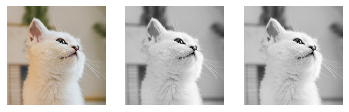

In [144]:
img = np.array(Image.open(filename))
plt.subplot(1, 3, 1); plt.imshow(img); plt.axis('off')
img = np.mean(img, axis=2).astype(np.uint8)
print(img.shape)
plt.subplot(1, 3, 2); plt.imshow(img, cmap='gray'); plt.axis('off')
img = cv2.imread(filename, flags=cv2.IMREAD_GRAYSCALE)
plt.subplot(1, 3, 3); plt.imshow(img, cmap='gray'); plt.axis('off')

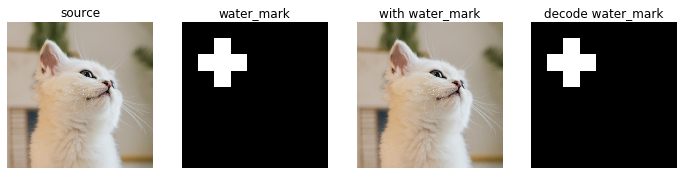

In [141]:
fig_size = plt.gcf().get_size_inches()  # 获取当前 figure 尺寸
plt.gcf().set_size_inches(fig_size * 2)   # 放大为两倍

img = np.array(Image.open(filename))
plt.subplot(1, 4, 1); plt.imshow(img); plt.axis('off'); plt.title('source')

# ===== 嵌入过程 =====
water_mark = np.full(img.shape, 0, dtype=np.uint8)
water_mark[200:300, 100:400] = 255
water_mark[100:400, 200:300] = 255
plt.subplot(1, 4, 2); plt.imshow(water_mark); plt.axis('off'); plt.title('water_mark')

# 将水印中大于 0 的重置为 1, 便于添加
water_mark = np.where(water_mark > 0, 1, 0).astype(np.uint8)

# 提取矩阵
t254 = np.full(img.shape, 254, dtype=np.uint8)
# 获取原始图像的高七位
img = cv2.bitwise_and(img, t254)
# 将水印嵌入
img = cv2.bitwise_or(img, water_mark)
plt.subplot(1, 4, 3); plt.imshow(img); plt.axis('off'); plt.title('with water_mark')

# ===== 提取过程 =====
t1 = np.full(img.shape, 1, dtype=np.uint8)
water_mark = cv2.bitwise_and(img, t1)
water_mark = np.where(water_mark > 0, 255, 0).astype(np.uint8)
plt.subplot(1, 4, 4); plt.imshow(water_mark); plt.axis('off'); plt.title('decode water_mark')


plt.show()
